# Инициализация

In [0]:
#@markdown - **Монтирование GoogleDrive** 
from google.colab import drive
drive.mount('GoogleDrive')

In [0]:
# #@markdown - **Размонтирование**
# !fusermount -u GoogleDrive

# Область кодов

In [0]:
#@title Приближение с помощью кривых { display-mode: "both" }
# Curve fitting
# В программе реализовано приближение исходных данных с помощью нейронных сетей с одным скрытым слоем
# Можно сравнить с результатами метода регуляризации Тихонова
# conding: utf-8
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [0]:
#@markdown - **Настройка параметров**
num_epoch = 200 #@param {type: "integer"}
# Предварительная обработка данных образца
data = np.array([[-2.95507616, 10.94533252],
                [-0.44226119, 2.96705822],
                [-2.13294087, 6.57336839],
                [1.84990823, 5.44244467],
                [0.35139795, 2.83533936],
                [-1.77443098, 5.6800407],
                [-1.8657203, 6.34470814],
                [1.61526823, 4.77833358],
                [-2.38043687, 8.51887713],
                [-1.40513866, 4.18262786]])
x = data[:, 0]
y = data[:, 1]
X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)
# Более прогнозируемые данные, чем исходные данные
x_pre = np.linspace(x.min(), x.max(), 30, endpoint=True).reshape(-1, 1)




In [0]:
#@markdown - **Создание graph**
graph = tf.Graph()
with graph.as_default():
    with tf.name_scope('Input'):
        x = tf.placeholder(tf.float32, shape=[None, 1], name='x')
        y = tf.placeholder(tf.float32, shape=[None, 1], name='y')
    with tf.name_scope('FC'):
        w_1 = tf.get_variable('w_fc1', shape=[1, 32], initializer=tf.initializers.truncated_normal(stddev=0.1))
        b_1 = tf.get_variable('b_fc1', initializer=tf.constant(0.1, shape=[32]))
        layer_1 = tf.nn.sigmoid(tf.matmul(x, w_1) + b_1)
    with tf.name_scope('Output'):
        w_2 = tf.get_variable('w_fc2', shape=[32, 1], initializer=tf.initializers.truncated_normal(stddev=0.1))
        b_2 = tf.get_variable('b_fc2', initializer=tf.constant(0.1, shape=[1]))
        layer_2 = tf.matmul(layer_1, w_2) + b_2
    
    with tf.name_scope('Loss'):
        loss = tf.reduce_mean(tf.pow(layer_2 - y, 2))
    with tf.name_scope('Train'):
        train_op = tf.train.AdamOptimizer(learning_rate=3e-1).minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#@markdown - **Обучение модели**
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())

    time_start = time.time()
    for num in range(num_epoch):
        _, ls = sess.run([train_op, loss], feed_dict={x: X, y: Y})
        print_list = [num+1, ls]
        if (num+1) % 10 == 0 or num == 0:
            print('Epoch {0[0]}, loss: {0[1]:.4f}.'.format(print_list))
    
    # time_start = time.time()
    y_pre = sess.run(layer_2, feed_dict={x: x_pre})
    sess.close()
    time_end = time.time()
    t = time_end - time_start
    print('Running time is: %.4f s.' % t)

Epoch 1, loss: 35.0321.
Epoch 10, loss: 3.2330.
Epoch 20, loss: 2.7602.
Epoch 30, loss: 1.2835.
Epoch 40, loss: 0.5167.
Epoch 50, loss: 0.2306.
Epoch 60, loss: 0.1536.
Epoch 70, loss: 0.1228.
Epoch 80, loss: 0.1032.
Epoch 90, loss: 0.0929.
Epoch 100, loss: 0.0843.
Epoch 110, loss: 0.0788.
Epoch 120, loss: 0.0755.
Epoch 130, loss: 0.0733.
Epoch 140, loss: 0.0717.
Epoch 150, loss: 0.0703.
Epoch 160, loss: 0.0690.
Epoch 170, loss: 0.0678.
Epoch 180, loss: 0.0667.
Epoch 190, loss: 0.0657.
Epoch 200, loss: 0.0647.
Running time is: 0.2594 s.


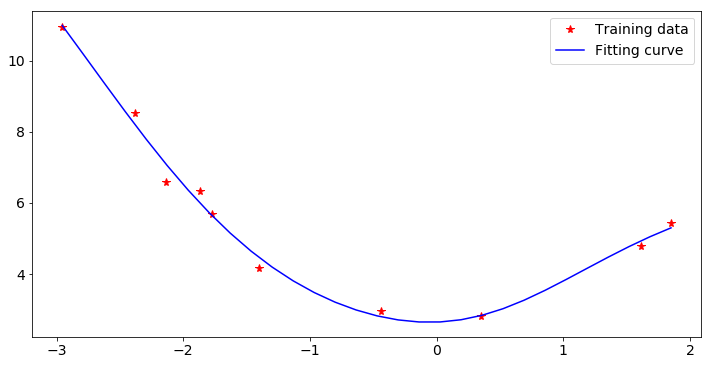

In [0]:
#@markdown  - **Кривая прогнозирования**
data_pre = np.c_[x_pre, y_pre]
DATA = [data, data_pre]
NAME = ['Training data', 'Fitting curve']
STYLE = ['*r', 'b']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
for dat, name, style in zip(DATA, NAME, STYLE):
    ax.plot(dat[:, 0], dat[:, 1], style, markersize=8, label=name)
    ax.legend(loc='upper right', fontsize=14)
    ax.tick_params(labelsize=14)
plt.show()